
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
vote    10000 non-null object
dtypes: object(1)
memory usage: 78.2+ KB


(0.5083, 0.5279)

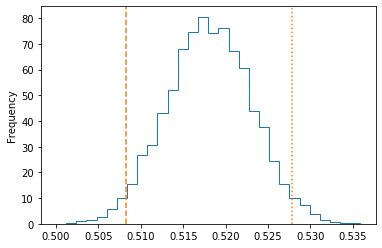

In [22]:
import math
import io
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import scipy.stats
import scipy.optimize
import scipy.spatial
poll = pd.read_csv('poll-larger.csv')
poll.info()
poll['vote'].value_counts(normalize=True)
def sample(oWinPercent,n=10000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < oWinPercent,'Saban','Orgeron')})
s = sample(0.4819,n=10000)
distDF = pd.DataFrame([sample(0.4819)['vote'].value_counts(normalize=True) for i in range(10000)])
distDF['Orgeron'].plot(kind='hist',histtype='step',bins=30, density=True)
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')
def samplingdist(oWinPercent,n=10000):
    return pd.DataFrame([sample(oWinPercent,n)['vote'].value_counts(normalize=True) for i in range(10000)])
def quantiles(oWinPercent,n=10000):
    distDF = samplingdist(oWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)
quantiles(0.4819)

In [23]:
#a) the 95% confidence interval is: (0.5082-0.5277)
#b) the point estimate is 0.5181
#c) margin of error is: +/- 0.01

#For some reason when using the 0.5181 in the code for the quantiles and the calculations, 
#it was giving me a 95% confidence interval of (0.4721-0.4916) but this is wrong since
#we know that the real percentage of winning is 0.5181. I used 1-0.5181 to get the 0.4819 values which corrects the results.